# Interpolación polinómica

En el presente cuaderno se realizará una exploración sobre la interpolación polinómica usando dos métodos: el método de Newton y el método de Lagrange.

# Importando librerias

Importamos las librerias necesarias. En este caso, usaremos $numpy$ para el almacenamiento de los datos, $sympy$ para el álgebra computacional y $matplotlib$ para ver como se adecuan los polinomios a los distintos puntos.

In [98]:
import numpy as np
from sympy import *
init_session(quiet = True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Almacenando los datos

Guardamos los datos suministrados en el ejercicio en arreglos de numpy.

In [99]:
X = np.array([0,     1,      2,       3,       4,       5,       6,      8,      9,      10    ])
Y = np.array([1, 0.54030, 0.41615, 0.98999, 0.65364, 0.28366, 0.9617, 0.1455, 0.91113, 0.83907 ])

# Graficando los puntos

En la siguiente gráfica, observamos como se distribuyen los puntos. Así pues, el objetivo de la interpolación polinómica será crear un polinomio que se adecue a los distintos valores suministrados.

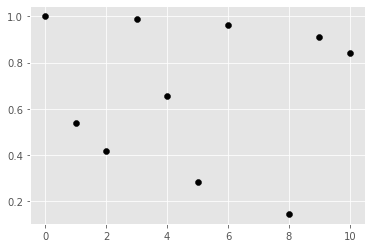

In [100]:
plt.scatter(X, Y, color = 'black')

# Interpolación polinómica de Newton

El método de la interpolación polínomica consiste en construir un polínomio a partir de las pendientes de los puntos suministrados. Estás pendientes, se pueden definir de forma recursiva de la siguiente forma:

$$f_{i}(x_{0}, x_{1},..., x_{i}) = \dfrac{f_{i-1}(x_{1},...,x_{i}) - f_{i-1}(x_{0}, x_{1},..., x_{i-1})}{x_{i} - x_{0}}$$

Dado que tenemos que usar los indices de las pendientes anteriores, definiremos un método $indices$ para poder hacer más fácil las operaciones.



# Método $indices$

Este crea las distintas llaves de los diccionarios en los cuales se almacenaran las pendientes. Por lo tanto, para el caso $f_{1}(x_{1}, x_{2})$, se crean los indices $'x1x2'$ como llave del diccionario $f[1]$.

In [101]:
def indices(k, i):
    
    cadena = ''
    
    for j in range(k, i + 1):
        
        cadena = cadena + 'x' + str(j)
        
    return cadena

# Cálculo de las pendientes

En la siguiente celda de código, calculamos las pendientes de los distintos puntos suministrados, basándonos en la fórmula recursiva anterior.

In [102]:
n = len(X)

f = [{}]

for j in range(n):
    
    f.append({})

    for i in range(n - j):

        if(j == 0):
        
            f[j]['x' + str(i)] = Y[i]
            
        else:
            
            f[j][indices(i, i + j)] = (f[j - 1][indices(i + 1, i + j)] 
                                       - f[j - 1][indices(i , i + (j - 1))]) / (X[i + j] - X[i])

# Creación del polinomio

Una vez hemos calculado las pendientes, podemos empezar a crear el polinomio de interpolación. Este también está dado por una fórmula recursiva, la cual es

$$p_{i}(x) = p_{i-1} + f_{i}(x_{0}, ..., x_{i})\prod_{j = 0}^{i-1}(x - x_{j})$$

Esta productoria se calcula con el siguiente método.

In [103]:
def productoria(n, X):
    
    p = 1
    
    for i in range(n):
        
        p = p * (x - X[i])
        
    return p

# Cálculo recursivo del polinomio

Usando el método $productoria$ y las distintas pendientes calculadas, podemos entonces crear el polinomio de interpolación de Newton. El siguiente método aplica la fórmula ya mencionada anteriormente.

In [104]:
p = f[0]['x0']

for i in range(1, n):
    
    p = p + f[i][indices(0, i)] * productoria(i , X)

# Polinomio resultante


In [105]:
print('El polinomio de interpolación es: ')
p

El polinomio de interpolación es: 


# Sobre el polinomio

El anterior es el polinomio obtenido con el método de interpolación de Newton. Verificaremos ahora que este polinomio si se adecua a los puntos suministrados.

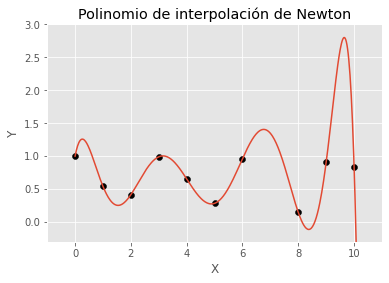

In [106]:
pol = lambdify(x, p)
_X = np.linspace(0, 11, 500)
plt.axis([-1, 11, -0.3, 3])
plt.scatter(X, Y, color = 'black')
plt.plot(_X, pol(_X))
plt.title('Polinomio de interpolación de Newton')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Vemos claramente que el polinomio se adecua a los datos suministrados. Ahora, realizaremos una predicción sobre el valor en $x=7$, usando el polinomio anteriormente conseguido.

In [107]:
print('Valor del polinomio en x = 7: ',pol(7))

Valor del polinomio en x = 7:  1.3461608333332649


# Método de Lagrange

Usaremos ahora el método de Lagrange para realizar la interpolación polinómica. Dado un conjunto de $k+1$ puntos, definimos el polinomio de interpolación $L(x)$ de la siguiente forma:

$$L(x) = \sum_{j=0}^{k}y_{j}\ell_{j}(x),$$

donde $\ell_{j}(x)$ está definido como

$$\ell_{j}(x) = \prod_{i=0,i\neq j}^{k} \dfrac{x-x_{i}}{x_{j} - x_{i}}.$$

En los siguiente método se implementa esta fórmula.

In [108]:
L = []

l = 1

p = 0

for i in range(n):

    l = 1
    
    for j in range(n):

        if(j != i):
            l = l * (x - X[j]) / (X[i] - X[j])
     
    l = Y[i] * l
    p = p + l        

In [109]:
print('El polinomio de interpolación es: ')
p

El polinomio de interpolación es: 


In [110]:
p = lambdify(x, p)

# Sobre el polinomio

El anterior es el polinomio obtenido con el método de interpolación de Lagrange. Verificaremos ahora que este polinomio si se adecua a los puntos suministrados.


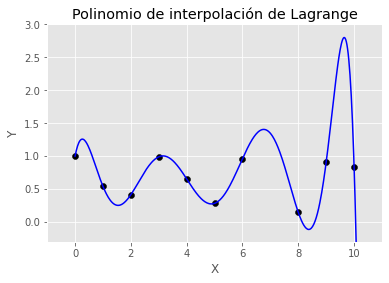

In [111]:
_X = np.linspace(0, 11, 500)
plt.title('Polinomio de interpolación de Lagrange')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([-1, 11, -0.3, 3])
plt.plot(_X, pol(_X), color = 'blue')
plt.scatter(X, Y, color = 'black')
plt.show()

Vemos claramente que el polinomio se adecua a los datos suministrados. Ahora, realizaremos una predicción sobre el valor en $x=7$, usando el polinomio anteriormente conseguido.

In [112]:
print('Valor del polinomio en x = 7: ',p(7))

Valor del polinomio en x = 7:  1.3461608333333392


# Análisis de resultados

Ambos métodos nos dan interpolaciones muy buenas para el conjunto de datos suministrados. Sin embargo, mientras que el polinomio de newton requiere una gran cantidad de cálculos en cuanto a las pendientes, además de que tiene una considerable complejidad algorítmica, el método de lagrange nos permite construir el polinomio con un algoritmo mas sencillo, y sin la necesidad de usar métodos auxiliares.